# Data Science Report 1

This is a Jupyter notebook that contains the code for data analysis described in *Money "might" buy you some happiness* report. The dataset used in this code can be found at [GSS webstite](http://gss.norc.org/get-the-data/stata).

In [52]:
import thinkstats2
import pandas
import thinkplot

%matplotlib inline

In [53]:
df = pandas.read_csv('GSS.dat', sep='\s+', header=None, skiprows=1)

In [54]:
df.columns = ["resp_yr","resp_id","school_years","fam_inc","gen_happy","mar_happy","part_happy","work_imp","dep"]

In [75]:
#Divide people into different income group and get rid of invalid response
high_income = df[(df.fam_inc >= 21) & ((df.fam_inc != 26) & (df.fam_inc != 98) & (df.fam_inc != 99))]
low_income = df[df.fam_inc <= 11]

#Get rid of invalid responses on gen_happy column
high_income = high_income[(high_income.gen_happy != 9) & (high_income.gen_happy != 8) & (high_income.gen_happy != 0)]
low_income = low_income[(low_income.gen_happy != 9) & (low_income.gen_happy != 8) & (low_income.gen_happy != 0)]

In [78]:
high_income_gen_happy_pmf = thinkstats2.Pmf(high_income.gen_happy)

low_income_gen_happy_pmf = thinkstats2.Pmf(low_income.gen_happy)

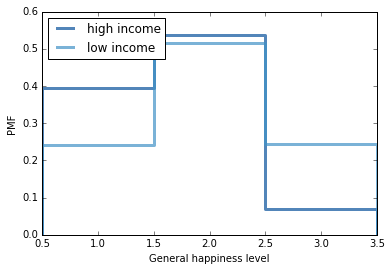

In [83]:
thinkplot.PrePlot(2)
thinkplot.pmf(high_income_gen_happy_pmf, label="high income")
thinkplot.pmf(low_income_gen_happy_pmf, label="low income")
thinkplot.Config(xlabel='General happiness level', ylabel='PMF')

Respondents to the survey rated their general happiness level from scale of 1 to 3, 1 being very happy and 3 being not too happy. Cdf graphs of general happiness level of high income group and low income group suggest that more fraction of people are happier in high income group compared to low income group.

In [89]:
print("Mean of general happiness value in high income group: ", high_income.gen_happy.mean())
print("Mean of general happiness value in low income group: ", low_income.gen_happy.mean())

Mean of general happiness value in high income group:  1.6736990154711673
Mean of general happiness value in low income group:  2.0023923444976077


Mean of general happiness value in the two groups clearly suggests that people in low-income group tend to be unhappier.

## Marriage happiness

In [92]:
#Divide people into different income group
high_income = df[(df.fam_inc >= 21) & ((df.fam_inc != 26) & (df.fam_inc != 98) & (df.fam_inc != 99))]
low_income = df[df.fam_inc <= 11]

#Get rid of invalid responses on mar_happy column

#This procedure is repeated because some people who provided invalid response to general happiness question but
#provided valid response to marriage happiness question are excluded if I continue using same 'high_income', and
#'low_income' variable that I used above
high_income = high_income[(high_income.mar_happy != 9) & (high_income.mar_happy != 8) & (high_income.mar_happy != 0)]
low_income = low_income[(low_income.mar_happy != 9) & (low_income.mar_happy != 8) & (low_income.mar_happy != 0)]

high_income_mar_happy_pmf = thinkstats2.Pmf(high_income.mar_happy)

low_income_mar_happy_pmf = thinkstats2.Pmf(low_income.mar_happy)

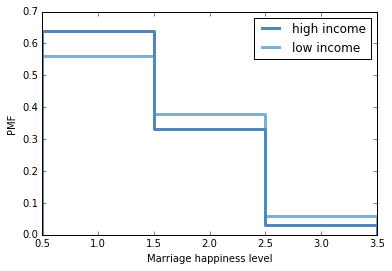

In [94]:
thinkplot.PrePlot(2)
thinkplot.pmf(high_income_mar_happy_pmf, label="high income")
thinkplot.pmf(low_income_mar_happy_pmf, label="low income")
thinkplot.Config(xlabel='Marriage happiness level', ylabel='PMF', loc="upper right")

Cdfs suggest that more fraction of people in high income group are happier in their marriage compared to low income group. However, this difference is relatively small compared to the difference in general happiness.

In [95]:
print("Mean of marriage happiness value in high income group: ", high_income.mar_happy.mean())
print("Mean of marriage happiness value in low income group: ", low_income.mar_happy.mean())

Mean of marriage happiness value in high income group:  1.3898635477582846
Mean of marriage happiness value in low income group:  1.5


## Feeling of accomplishment 

The survey asked how much people valued the feeling of accomplishment and the job being important in their job.

In [97]:
#Divide people into different income group and get rid of invalid response
high_income = df[(df.fam_inc >= 21) & ((df.fam_inc != 26) & (df.fam_inc != 98) & (df.fam_inc != 99))]
low_income = df[df.fam_inc <= 11]

#Get rid of invalid responses
high_income = high_income[(high_income.work_imp != 9) & (high_income.work_imp != 8) & (high_income.work_imp != 0)]
low_income = low_income[(low_income.work_imp != 9) & (low_income.work_imp != 8) & (low_income.work_imp != 0)]

high_income_work_imp_pmf = thinkstats2.Pmf(high_income.work_imp)

low_income_work_imp_pmf = thinkstats2.Pmf(low_income.work_imp)

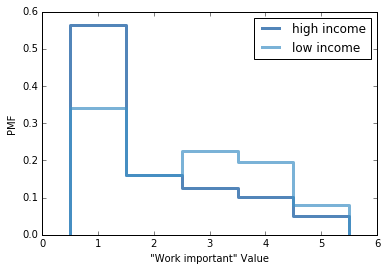

In [98]:
thinkplot.PrePlot(2)
thinkplot.pmf(high_income_work_imp_pmf, label="high income")
thinkplot.pmf(low_income_work_imp_pmf, label="low income")
thinkplot.Config(xlabel='"Work important" Value', ylabel='PMF', loc="upper right")

The respondents were asked to rank which aspects of their job they valued the most. The five given aspects were income level, number of hours worked, chance of promotion, job security, and the perceived importance and accomplishment of the job. The above cdf is the respondents' rank of the 'job importance'.

1 represents that a respondent value the feeling of accomplishment and importance the most in their job. 5 represent that a respondent value this quality the least.

Cdf suggests that the people in high income group value the feeling of accomplishment and important in their job more than the people in low income group.

In [99]:
print("Mean of work importance value in high income group: ", high_income.work_imp.mean())
print("Mean of work importance value in low income group: ", low_income.work_imp.mean())

Mean of work importance value in high income group:  1.9154518950437318
Mean of work importance value in low income group:  2.515


The mean values of the two groups supports the same conclusion.